<a href="https://colab.research.google.com/github/zdyaknoivl/predicting-user-churn/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первая часть. Исследование

In [ ]:
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import math
import itertools

## Загрузка данных

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 76.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 49.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 17.2MB/s]


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных

In [ ]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', None).astype('float64') # Перевод TotalSpent во float64

In [ ]:
def construct_a_graph(*features) -> None:
    """ Строит графики """
    for feature in features:
        fig = px.histogram(data, x=feature, title=feature)
        fig.show()

In [ ]:
construct_a_graph(*num_cols) # Построение графиков численных признаков

In [ ]:
data[cat_cols].nunique() # Количество уникальных значений в категориальных столбцах

Sex                         2
IsSeniorCitizen             2
HasPartner                  2
HasChild                    2
HasPhoneService             2
HasMultiplePhoneNumbers     3
HasInternetService          3
HasOnlineSecurityService    3
HasOnlineBackup             3
HasDeviceProtection         3
HasTechSupportAccess        3
HasOnlineTV                 3
HasMovieSubscription        3
HasContractPhone            3
IsBillingPaperless          2
PaymentMethod               4
dtype: int64

In [ ]:
def counts_of_values() -> dict:
    """ Возвращает информацию об уникальных значениях каждого из столбцов """
    dict_of_value_counts = {}
    for column_name in cat_cols:
        dict_of_value_counts[column_name] = dict(data[column_name].value_counts())
    return dict_of_value_counts

In [ ]:
counts_of_values()

{'Sex': {'Male': 2655, 'Female': 2627},
 'IsSeniorCitizen': {0: 4440, 1: 842},
 'HasPartner': {'No': 2705, 'Yes': 2577},
 'HasChild': {'No': 3676, 'Yes': 1606},
 'HasPhoneService': {'Yes': 4761, 'No': 521},
 'HasMultiplePhoneNumbers': {'No': 2511, 'Yes': 2250, 'No phone service': 521},
 'HasInternetService': {'Fiber optic': 2341, 'DSL': 1800, 'No': 1141},
 'HasOnlineSecurityService': {'No': 2612,
  'Yes': 1529,
  'No internet service': 1141},
 'HasOnlineBackup': {'No': 2332, 'Yes': 1809, 'No internet service': 1141},
 'HasDeviceProtection': {'No': 2317, 'Yes': 1824, 'No internet service': 1141},
 'HasTechSupportAccess': {'No': 2604,
  'Yes': 1537,
  'No internet service': 1141},
 'HasOnlineTV': {'No': 2099, 'Yes': 2042, 'No internet service': 1141},
 'HasMovieSubscription': {'No': 2081,
  'Yes': 2060,
  'No internet service': 1141},
 'HasContractPhone': {'Month-to-month': 2920,
  'Two year': 1280,
  'One year': 1082},
 'IsBillingPaperless': {'Yes': 3148, 'No': 2134},
 'PaymentMethod': 

<Axes: >

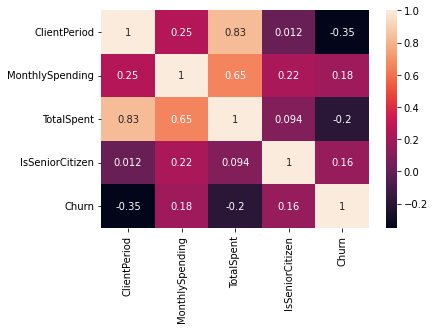

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True) # Тепловая карта корреляций численных признаков

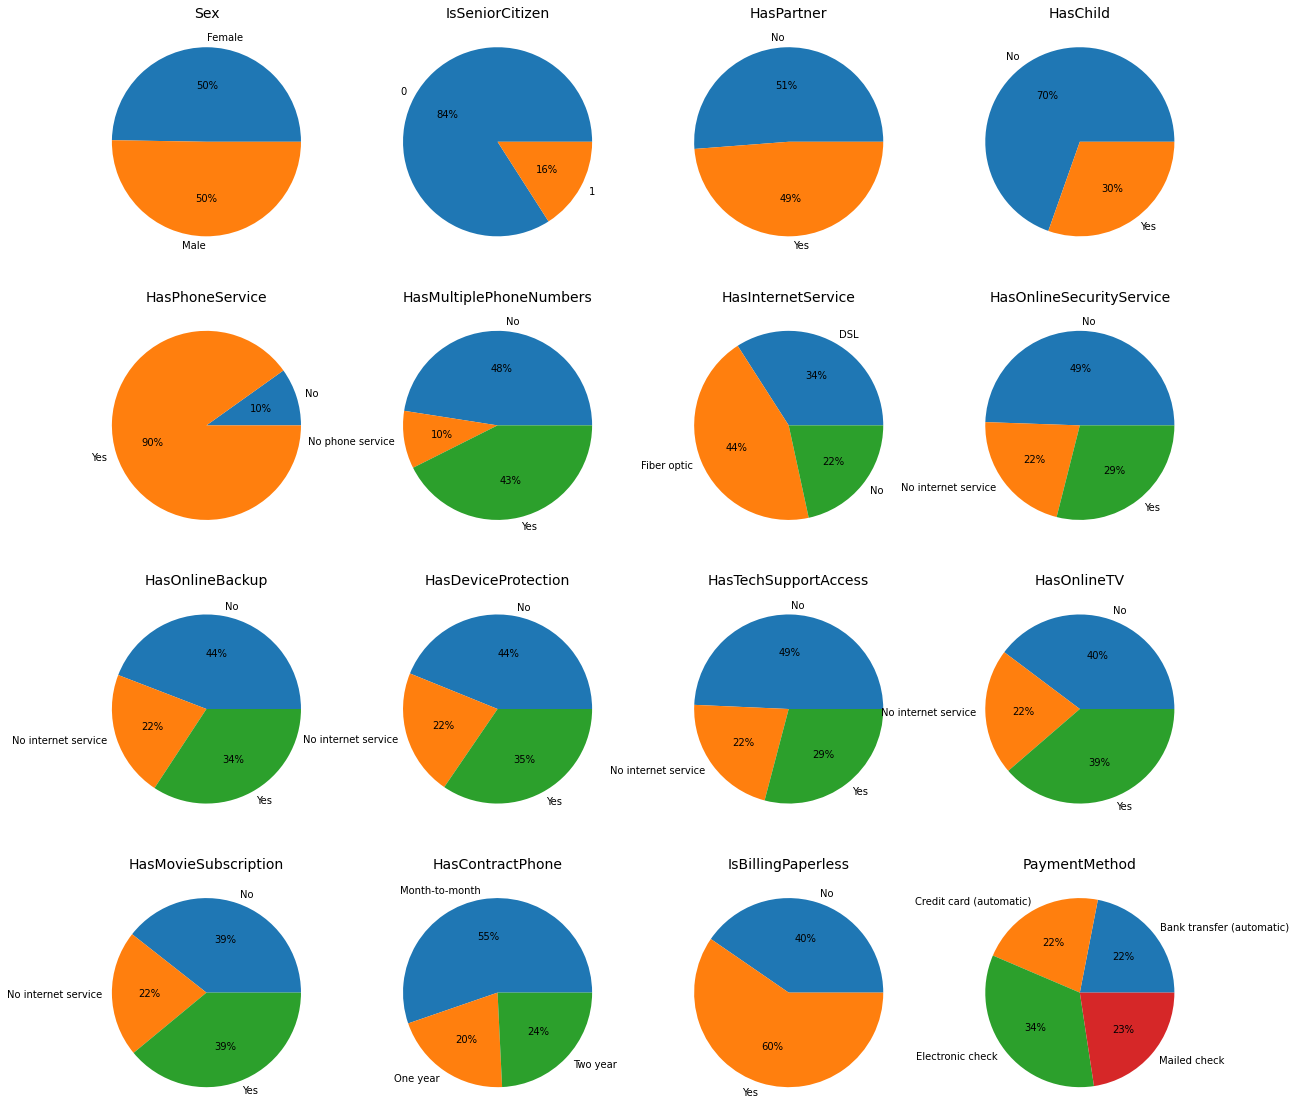

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    col_values = data.groupby(by=col).size()
    axes[i].pie(x=col_values, autopct='%.0f%%', labels=col_values.index)
    axes[i].set_title(col).set_fontsize(14)

In [ ]:
construct_a_graph(target_col) # Распределение таргета

Имеется дисбаланс классов, но несущественный. Значит, не стоит использовать метрику accuracy. Использовать методы борьбы с imbalanced dataset не стоит, тк разница в классах не такая существенная.

Text(0.5, 1.08, 'Зависимости для признаков')

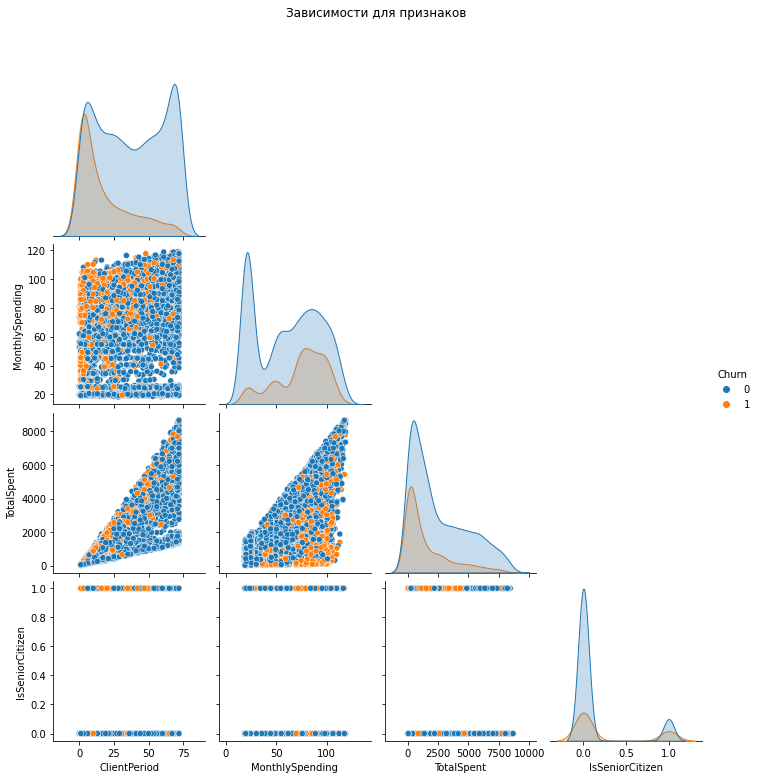

In [ ]:
sns.pairplot(data=data, hue=target_col, corner=True).fig.suptitle('Зависимости для признаков', y=1.08) # Посмотрим на графики зависимостей для признаков

Никаких зависимостей между признаками не найдено => при feature engineering'е стоит добавлять только произведения признаков

## Применение моделей

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from catboost import CatBoostClassifier

In [ ]:
class FeatureProds(): # Класс для добавления произведений признаков и создания тренировочной и тестовой выборок

    def __init__(self, data):
        self.data = data
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.X_train_catboost = None 
        self.X_test_catboost = None 
        self.y_train_catboost = None 
        self.y_test_catboost = None

    def _get_feature_prod(self, df: pd.DataFrame, feature: str) -> None:
        """Добавляет колонки с произведением признаков в датасет"""
        features = feature.split(' * ')
        features = list(map(lambda x: df[x], features))
        df[feature] = math.prod(features)

    def _add_new_feature(self, feature: list, X_train: pd.DataFrame, X_test: pd.DataFrame) -> None:
        """Добавляет по отдельности произведения признаков в train и в test"""
        self._get_feature_prod(X_train, feature)
        self._get_feature_prod(X_test, feature)

    def _get_train_test(self, is_catboost=False):
        """Создает, кодирует и нормирует (для катбуста просто создает) тренировчную и тестовую выборку.""" 
        X, y = data[feature_cols], data[target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train = X_train.fillna(X_train.mean())
        X_test = X_test.fillna(X_train.mean())
        if not is_catboost:
            scaler = StandardScaler()
            X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
            X_test[num_cols] = scaler.transform(X_test[num_cols])
            X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
            X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
        return X_train, X_test, y_train, y_test 

    def _clear_data(self) -> None:
        """Очищает данные"""
        self.X_train.rename(columns={'IsSeniorCitizen_1': 'IsSeniorCitizen'}, inplace=True)
        self.X_test.rename(columns={'IsSeniorCitizen_1': 'IsSeniorCitizen'}, inplace=True)
        self.X_train_catboost['IsSeniorCitizen'] = self.X_train_catboost['IsSeniorCitizen'].astype('int64')
        self.X_test_catboost['IsSeniorCitizen'] = self.X_test_catboost['IsSeniorCitizen'].astype('int64')

    def add_new_features_test(self, test_data: pd.DataFrame, features: list) -> None:
        """Добавляет новые признаки в test_data"""
        test_data['TotalSpent'] = test_data['TotalSpent'].replace(' ', data['TotalSpent'].mean()).astype('float64')
        for column in features:
            self._get_feature_prod(test_data, column)

    def train_test_and_add_new_features(self, new_features: list) -> dict:
        """Добавляет новые признаки и возвращает тренировочную и валидационную выборки."""
        self.X_train, self.X_test, self.y_train, self.y_test = self._get_train_test()
        self.X_train_catboost, self.X_test_catboost, self.y_train_catboost, self.y_test_catboost = self._get_train_test(True)
        self._clear_data()

        for column in new_features:
            self._add_new_feature(column, self.X_train, self.X_test)
            self._add_new_feature(column, self.X_train_catboost, self.X_test_catboost)
            num_cols.append(column)

        feature_cols = num_cols + cat_cols

        result = {
            'X_train': self.X_train,
            'X_test': self.X_test,
            'y_train': self.y_train,
            'y_test': self.y_test,
            'X_train_catboost': self.X_train_catboost,
            'X_test_catboost': self.X_test_catboost,
            'y_train_catboost': self.y_train_catboost,
            'y_test_catboost': self.y_test_catboost

        }
        return result

In [ ]:
feature_prods = FeatureProds(data)
features = ['TotalSpent * MonthlySpending', 'ClientPeriod * IsSeniorCitizen', 'MonthlySpending * IsSeniorCitizen'] # Добавляем эти признаки
train_test = feature_prods.train_test_and_add_new_features(features)
X_train, X_test = train_test['X_train'], train_test['X_test']
y_train, y_test = train_test['y_train'], train_test['y_test']
X_train_catboost, X_test_catboost = train_test['X_train_catboost'], train_test['X_test_catboost']
y_train_catboost, y_test_catboost = train_test['y_train_catboost'], train_test['y_test_catboost']

<ipython-input-46-4c69d3bc5b30>:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-46-4c69d3bc5b30>:30: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-46-4c69d3bc5b30>:29: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-46-4c69d3bc5b30>:30: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the redu

In [ ]:
def results(model, is_catboost=False) -> None:
    """Пишет результат модели по метрике roc_auc_score"""
    if not is_catboost:
        y_pred = model.predict_proba(X_test)[:, 1]
    else:
        y_pred = model.predict_proba(X_test_catboost)[:, 1]
    print(f'roc_auc_score = {roc_auc_score(y_test, y_pred)}')

In [ ]:
# Логистическая регрессия со стандартными параметрами
logistic_regression = LogisticRegression().fit(X_train, y_train)
results(logistic_regression)

roc_auc_score = 0.829914758821954


In [ ]:
#Логистическая регрессия с подобранными по сетке параметрами
logistic_model = LogisticRegression()
params = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [500, 1000]
}

logistic_regression_grid = GridSearchCV(logistic_model, params, scoring='roc_auc', n_jobs=-1)
logistic_regression_grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'max_iter': [500, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc')

In [ ]:
best_log_reg = logistic_regression_grid.best_estimator_
results(best_log_reg)

roc_auc_score = 0.8280353894034965


In [ ]:
logistic_regression_grid.best_params_ # Параметры

{'C': 100, 'max_iter': 500, 'solver': 'saga'}

Лучшее качество у линейных моделей получилось = 0.8280353894034965 с параметрами: C = 100, max_iter = 500, solver = saga

In [ ]:
# Случайный лес со стандартными параметрами
random_forest = RandomForestClassifier().fit(X_train, y_train)
results(random_forest)

roc_auc_score = 0.8067689622371423


In [ ]:
# Градиентный бустинг со стандартными параметрами
gradboost = GradientBoostingClassifier().fit(X_train, y_train)
results(gradboost)

roc_auc_score = 0.8220509600022166


In [ ]:
# Стэкинг со стандартными параметрами
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

estimators = [('rf', rf_model), ('lr', lr_model)]
stack_model = StackingClassifier(estimators=estimators, final_estimator=CatBoostClassifier(verbose=False))
stack_model.fit(X_train, y_train)
results(stack_model)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

roc_auc_score = 0.8291205289940065


In [ ]:
# Катбуст со стандартными параметрами
catboost = CatBoostClassifier(learning_rate=0.01, num_trees=490, verbose=False)
catboost.fit(X_train_catboost, y_train_catboost, cat_features=cat_cols)
results(catboost, is_catboost=True)

roc_auc_score = 0.8314362630563072


In [ ]:
#Катбуст с подобранными по сетке параметрами
catboost_model = CatBoostClassifier(
    eval_metric='AUC',
    random_seed=42,
    verbose=1
)

params = {
    'num_trees': [100, 250, 400],
    'learning_rate': [0.01, 0.03, 0.1, 0.3],
    'depth': [4, 6, 8],
}

catboost_grid = GridSearchCV(catboost, params, scoring='roc_auc', n_jobs=-1)

catboost_grid.fit(
    X_train_catboost, y_train_catboost,
    cat_features=cat_cols,
    eval_set=(X_test_catboost, y_test_catboost),
    verbose=False
)

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7fce2c5418b0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8],
                         'learning_rate': [0.01, 0.03, 0.1, 0.3],
                         'num_trees': [100, 250, 400]},
             scoring='roc_auc')

In [ ]:
best_catboost = catboost_grid.best_estimator_
results(best_catboost, is_catboost=True)

roc_auc_score = 0.8325629611843259


In [ ]:
catboost_grid.best_params_ # Параметры

{'depth': 4, 'learning_rate': 0.03, 'num_trees': 400}

Лучшее качество у ансамблей получилось = 0.8325629611843259 с параметрами: depth = 4, learning_rate = 0.03, num_trees = 400